# IMDb


# Defining the Problem and Assembling a Dataset

 The IMDb data set is attempting to predict whether a movie review is positive or negative. The set contains 50000 reviews and is split into a 25000 review training set and a 25000 review test set. Both sets have an even 50% positive and negative reviews. The labels for the reviews are lists of 1 and 0 denoting positive and negative reviews respectively. This is a binary classification.


In [ ]:
from tensorflow.keras.datasets import imdb

((train_data, train_labels), (test_data, test_labels)) = imdb.load_data(num_words = 10000)

# Choosing a Measure of Success
As the this is a binary classification problem the output will be a probability so my loss function will be binary-crossentropy.

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Deciding on an Evaluation Protocol
For this model I will be validating progress by maintaining a hold-out validation set. To do this I will create a set of 10000 samples and removing them from the training set. I will then train the model and evaluate the results looking out for overfitting. 

In [ ]:
x_val = x_train[:10000]

partial_x_train = x_train[10000:]

y_val = y_train[:10000]

partial_y_train = y_train[10000:]

# Preparing Your Data
The data provided in the IMDb set is in the format of a set of lists of word indices that encode the reviews that only recognises the top 10000 most popular words in the dictionary. To prepare this data to be used with the model I will vectorise the data with one-hot encoding. This is where the integer is converted into a 1 at the index of the integer as the set is limited to the 10000 most popular words no index will be greater than 10000 giving me a training and test sets of the shape (25000, 10000). I will the also vectorise the labels.

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):

​   results = np.zeros( (len(sequences), dimension) )

​   for i, sequence in enumerate(sequences):

​     results[i, sequence] = 1.

​   return results

x_train = vectorize_sequences(train_data)

x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')

y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]

partial_x_train = x_train[10000:]

y_val = y_train[:10000]

partial_y_train = y_train[10000:]

# Developing a Model
I will now take these elements and develop a model.

In [166]:
model = models.Sequential()

model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))

model.add(layers.Dense(16, activation = 'relu'))

model.add(layers.Dense(1, activation = 'sigmoid'))

For this problem I have created a sequential model of dense layers.

 

The first layer has an output shape of 16 which is a 16 dimensional vector and an input shape of 10000 that is the shape of a one hot encoded review. The layer also has a relu activation.

 

The second layer has an output shape of 16 but has no input shape as it takes the output shape of the previous layer as an input shape.

 

The third and final layer has an output shape of 1 and a sigmoid activation. This is because we are dealing with a binary classification problem where the output will be a single digit either 1 or 0 so the output shape is 1. The sigmoid activation will squash the output into a probability between 0 and 1.

## Scaling up: Developing a Model That Overfits

at this stage I will create a low-capacity model and increase the hyperparameters separately. testing with the validation data looking for the point of overfitting.



### Low Capacity Model

this model is a starting point it has a low capacity and under fits the data set I will increase the hyperparameters to the point that I see overfitting in an attempt create a model with sufficient but limited capacity.


In [3]:
from tensorflow.keras.datasets import imdb

((train_data, train_labels), (test_data, test_labels)) = imdb.load_data(num_words = 10000)

import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

from tensorflow.keras import models
from tensorflow.keras import layers

In [4]:
model = models.Sequential()
model.add(layers.Dense(4, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

low_cap = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 5,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 



Epoch 1/5
30/30 [==============================] - 1s 41ms/step - loss: 0.6002 - accuracy: 0.6980 - val_loss: 0.5357 - val_accuracy: 0.8096
Epoch 2/5
30/30 [==============================] - 1s 29ms/step - loss: 0.4704 - accuracy: 0.8609 - val_loss: 0.4482 - val_accuracy: 0.8602
Epoch 3/5
30/30 [==============================] - 1s 29ms/step - loss: 0.3836 - accuracy: 0.9001 - val_loss: 0.3886 - val_accuracy: 0.8731
Epoch 4/5
30/30 [==============================] - 1s 29ms/step - loss: 0.3203 - accuracy: 0.9156 - val_loss: 0.3474 - val_accuracy: 0.8810
Epoch 5/5
30/30 [==============================] - 1s 28ms/step - loss: 0.2746 - accuracy: 0.9270 - val_loss: 0.3197 - val_accuracy: 0.8868


In [5]:
import matplotlib.pyplot as plt
    
def plot_loss(history_dict):

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


In [6]:
def plot_acc(history_dict):
    
    plt.clf()

    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'bo', label = 'Training acc')
    plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

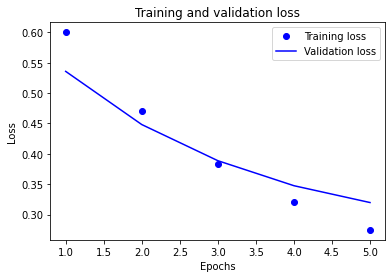

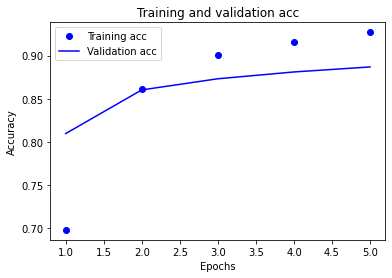

In [7]:
plot_loss(low_cap.history)
plot_acc(low_cap.history)

this model has a good statistical power but is not complex enuf to model the problem.

I will now expand the model to the point of overfitting.


### Units

units are the dimensions of the representational space of a layer. the greater the number of units in a layer the more capacity the model will have for memorization. 

I will now experiment with different amounts units in the representational space of the model and testing with the validation data.

In [12]:
import tensorflow as tf
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        c = ['\b|', '\b/', '\b-', '\b\\'] 
        print(c[epoch % 4], end='')
    def on_epoch_end(self, epoch, logs=None):
        print('\b', end='')

In [173]:
def build_model_units(layer_1_units, layer_2_units):
    model = models.Sequential()
    model.add(layers.Dense(layer_1_units, activation = 'relu', input_shape = (10000,)))
    model.add(layers.Dense(layer_2_units, activation = 'sigmoid'))
    model.compile(optimizer = 'rmsprop',
                  loss = 'binary_crossentropy',
                  metrics = ['acc'])
    return model

In [174]:
histories_units = {}
for i in [4, 16, 512]:
    model = build_model_units(i, 1)
    model_name = str(i)
    print('Training', model_name)
    history = model.fit(partial_x_train, 
                     partial_y_train,
                     epochs=20,
                     batch_size=512,
                     validation_data = (x_val, y_val),
                     verbose=0,
                     callbacks=[CustomCallback()])
    histories_units[model_name] = history

Training 4
|/-\|/-\|/-\|/-\|/-\Training 16
|/-\|/-\|/-\|/-\|/-\Training 512
|/-\|/-\|/-\|/-\|/-\

In [18]:
def plot_loss_comparison(loss_a, label_a, loss_b, label_b, y_label, title):

    epochs = range(1, len(loss_a) + 1)

    plt.plot(epochs, loss_a, 'b+', label = label_a)
    plt.plot(epochs, loss_b, 'bo', label = label_b)
    plt.xlabel('Epochs')
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()

In [17]:
def plt_histories_comparison(hists):
  keys = list(hists.keys())
  for i in range(len(keys)-1):
    net_a = keys[i]
    net_b = keys[i+1]
    plot_loss_comparison(hists[net_a].history['val_loss'], net_a, 
                        hists[net_b].history['val_loss'], net_b, 'loss',  
                        title = 'validation loss ' + str(net_a) + '/' + str(net_b))

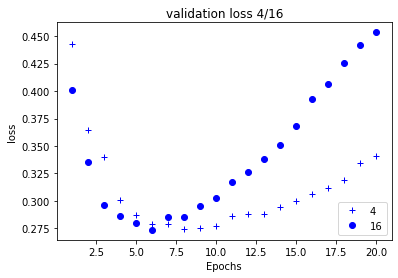

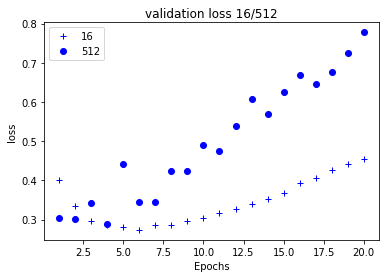

In [177]:
plt_histories_comparison(histories_units)

the model with 4 units looks to be underfitting as it makes it too inflexible to learn from the dataset. whereas the larger 512 model begins overfitting sooner and increases quickly as it is too good at learning from the training data and is not able to generalise.

I believe that 16 is the optimal amount of units for the model.


### Layers

layers are esentialy functions that performs tensor operations on an input tensor and outputs another tensor.

in this example the dense layer function is output 

= relu(dot(W, input) + b)

this can be interprated as the dot product of the imput tensor and the output tensor plus the bias the result is then run through the relu function that is simply the maximum of its input and 0.

the greater the amount of units in a layer the more capacity the model will have for memorization.

I will now experimenting different amounts of layers in the modle and testting with the validation data.

In [21]:
def build_model_layers(units):
    model = models.Sequential()
    
    model.add(layers.Dense(units[0], activation = 'relu', input_shape = (10000,)))
    
    if len(units)>1:
      for x in units[1:]:
        model.add(layers.Dense(x, activation = 'relu'))
    
    model.add(layers.Dense(1, activation = 'sigmoid'))
    
    model.compile(optimizer = 'rmsprop',
                  loss = 'binary_crossentropy',
                  metrics = ['acc'])  
    return model

In [22]:
layers_loss = []
layers_acc = []

histories_layers = {}
model_layers = [[16], [16, 16], [16, 16, 16], [16, 16, 16, 16]]
for i in range(len(model_layers)):
    model = build_model_layers(model_layers[i])
    model_name = str(len(model_layers[i])) + '-layers'
    print('Training', model_name)
    history = model.fit(partial_x_train, 
                     partial_y_train,
                     epochs=20,
                     batch_size=512,
                     validation_data = (x_val, y_val),
                     verbose=0,
                     callbacks=[CustomCallback()])
    histories_layers[model_name] = history
    layers_loss.append(min(history.history['val_loss']))
    layers_acc.append(max(history.history['val_acc']))

    

Training 1-layers
|/-\|/-\|/-\|/-\|/-\Training 2-layers
|/-\|/-\|/-\|/-\|/-\Training 3-layers
|/-\|/-\|/-\|/-\|/-\Training 4-layers
|/-\|/-\|/-\|/-\|/-\

In [23]:
def plt_histories(hists):
  keys = list(hists.keys())
  for i in range(len(keys)):
    net_a = keys[i]
    plot_loss_comparison(hists[net_a].history['loss'], 'train_loss', 
                        hists[net_a].history['val_loss'], 'val_loss', 'loss',  
                        title = 'validation loss ' + str(net_a))

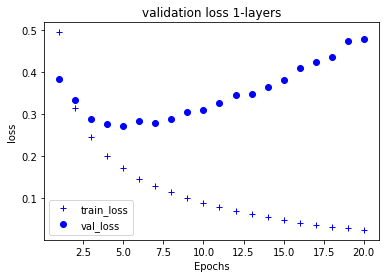

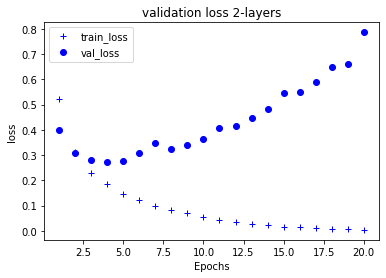

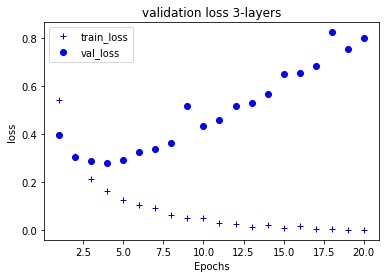

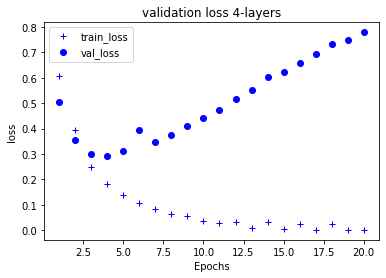

In [24]:
  plt_histories(histories_layers)

Results

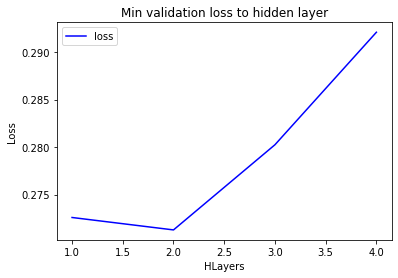

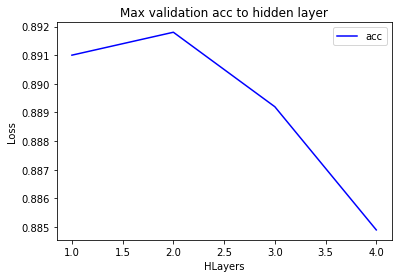

In [25]:
    plt.plot(range(1,5), layers_loss, 'b', label = 'loss')
    plt.title('Min validation loss to hidden layer')
    plt.xlabel('HLayers')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(range(1,5), layers_acc, 'b', label = 'acc')
    plt.title('Max validation acc to hidden layer')
    plt.xlabel('HLayers')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Theas graphs show the loss and accuracy of models with 1 to 4 hidden layers at their optimal epoch.

I believe this shows that 2 hidden layers is the best option for this model.

### Epochs

epochs are full iterations over the training data this will happen in mini batches of a specified size. in the following examples the model will train on mini batches of size 512 for 10 epochs. after every mini batch is processed a gradient update will be performed. 

 

I will now train my model on a large number of epochs while validating the results to find the point of overfitting.

In [183]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

epoch_test = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 40ms/step - loss: 0.5274 - accuracy: 0.7908 - val_loss: 0.3943 - val_accuracy: 0.8695
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3176 - accuracy: 0.8985 - val_loss: 0.3099 - val_accuracy: 0.8874
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2332 - accuracy: 0.9233 - val_loss: 0.3025 - val_accuracy: 0.8783
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1807 - accuracy: 0.9414 - val_loss: 0.2857 - val_accuracy: 0.8853
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1468 - accuracy: 0.9523 - val_loss: 0.2812 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1211 - accuracy: 0.9608 - val_loss: 0.2926 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0993 - accuracy: 0.9705 - val_loss: 0.3092 - val_accuracy: 0.8855
Epoch 8/20
30

I will now use a plot loss function to plot the loss data of the training and validation sets at each epoch.


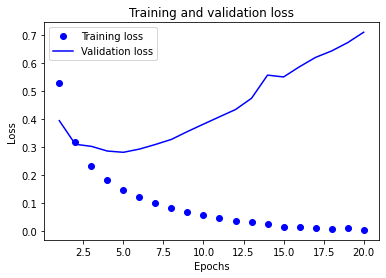

In [184]:
plot_loss(epoch_test.history)

We can see from the graph that at first the validation loss decreases but at around epochs 4 and 5 the validation loss begins to increase. This shows the model is overfitting.

 

I will now use a plot_acc function to plot the accuracy data of the training and validation sets at each epoch.

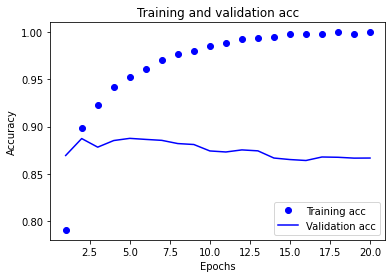

In [185]:
plot_acc(epoch_test.history)

We can see that the validation accuracy begins to decrease at the 4th epoch and is beginning to experience overfitting

for a model of this configuration I believe that 4 epochs is will give the best results from the test data set

## Regularisation

Regularisation is a set of techniques that can be applied to the learning algorithm of a network helping it generalise. This should in turn improve performance on unseen data.

### l1 and l2

L1 norm or lasso regression is a cost equal to the absolute value of the set of weight parameters that is added to the loss function. 

 

L2 norm or ridge regression is similar except it is the square of the weight parameters  

In [186]:
from tensorflow.keras import regularizers

def build_model_l1_l2(layer_1_units, layer_2_units, layer_3_units, reg):
    model = models.Sequential()
    
    if (reg == 'l1'):
        model.add(layers.Dense(layer_1_units, kernel_regularizer = regularizers.l1(0.001), 
                               activation='relu', input_shape=(10000,)))
        model.add(layers.Dense(layer_2_units, kernel_regularizer=regularizers.l1(0.001), 
                               activation='relu'))

    elif (reg == 'l2'):
        model.add(layers.Dense(layer_1_units, kernel_regularizer = regularizers.l2(0.001), 
                               activation='relu', input_shape=(10000,)))
        model.add(layers.Dense(layer_2_units, kernel_regularizer=regularizers.l2(0.001), 
                               activation='relu'))
    
    else:
        model.add(layers.Dense(layer_1_units, activation='relu', input_shape=(10000,)))
        model.add(layers.Dense(layer_2_units, activation='relu'))
    

    model.add(layers.Dense(layer_3_units, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])
    return model

In [187]:
histories_l1_l2 = {}
for i in ['No', 'l1', 'l2']:
    model = build_model_l1_l2(16, 16, 1, i)
    model_name = str(i) + ' regularisation'
    print('Training ' + model_name)
    history = model.fit(partial_x_train, 
                     partial_y_train,
                     epochs=20,
                     batch_size=512,
                     validation_data = (x_val, y_val),
                     verbose=0,
                     callbacks=[CustomCallback()])
    histories_l1_l2[model_name] = history

Training No regularisation
|/-\|/-\|/-\|/-\|/-\Training l1 regularisation
|/-\|/-\|/-\|/-\|/-\Training l2 regularisation
|/-\|/-\|/-\|/-\|/-\

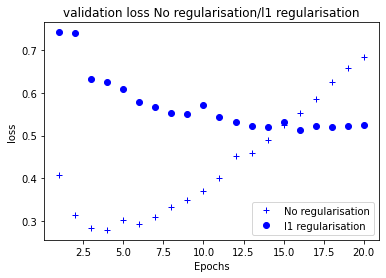

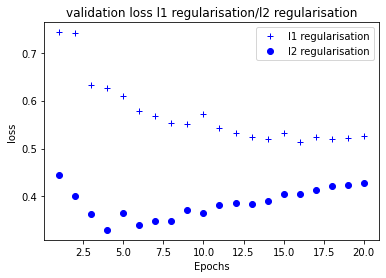

In [188]:
plt_histories_comparison(histories_l1_l2)

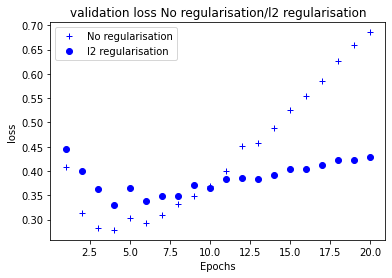

In [189]:
  net_a = 'No regularisation'
  net_b = 'l2 regularisation'
  plot_loss_comparison(histories_l1_l2[net_a].history['val_loss'], net_a, 
                     histories_l1_l2[net_b].history['val_loss'], net_b, 'loss',  
                     title = 'validation loss ' + str(net_a) + '/' + str(net_b))

We can see from the first graph that the l1 regularisation helps to stop overfitting but, the loss overall is too high. Whereas l2 stops overfitting without as high a rate of loss.

 

Even though overfitting is reduced we can see from the third graph that there is still a significant increase in loss over no regularisation. instead I will just train to 4 epochs to avoid overfitting.

### Dropout

Dropout is a technique where a layer is added to the network, and a fraction of the output of that layer is zeroed. The fraction is determined by the dropout rate that is conventionally between 0.2 and 0.5.

In [190]:
def build_model_dropout(drop):
    model = models.Sequential()
    
    model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    if(drop):
        model.add(layers.Dropout(0.5))

    model.add(layers.Dense(16, activation='relu'))
    if(drop):
        model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])
    return model

In [191]:
histories_dropout = {}
for i in [True, False]:
    model = build_model_dropout(i)
    model_name = ' dropout = ' + str(i)
    print('Training ' + model_name)
    history = model.fit(partial_x_train, 
                     partial_y_train,
                     epochs=20,
                     batch_size=512,
                     validation_data = (x_val, y_val),
                     verbose=0,
                     callbacks=[CustomCallback()])
    histories_dropout[model_name] = history

Training  dropout = True
|/-\|/-\|/-\|/-\|/-\Training  dropout = False
|/-\|/-\|/-\|/-\|/-\

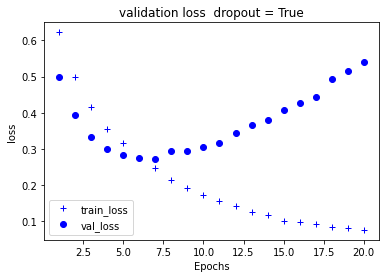

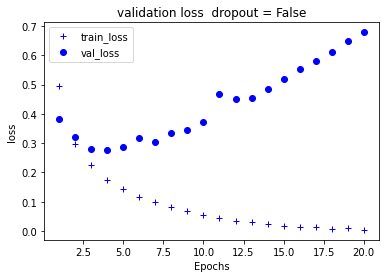

In [192]:
plt_histories(histories_dropout)

We can see that the model performs worse on the training date when using dropout. however, on the validation data overfitting begins at around 6 epochs rather than 4 with dropout but then precedes to increase at a similar rate.

although overfitting begins later with dropout there isn’t enough of an improvement on performance so I will not include it in the model.

# Testing the model

## Training Set

Now that I have a model that I believe is optimised for the problem I will retrain the model on the entire training set.

In [193]:
from tensorflow.keras.datasets import imdb

((train_data, train_labels), (test_data, test_labels)) = imdb.load_data(num_words = 10000)

import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from tensorflow.keras import models, layers


model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 26ms/step - loss: 0.4288 - accuracy: 0.8223
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2470 - accuracy: 0.9099
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1929 - accuracy: 0.9309
Epoch 4/4
49/49 [==============================] - 1s 26ms/step - loss: 0.1616 - accuracy: 0.9432


## Test Set 

Now that the model has been trained, I will evaluate it on the test set.

In [194]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.3071 - accuracy: 0.8800


This model is achieving an accuracy of 88% a relative improvement of 76% over random (50%).

In [195]:
pred = model.predict(x_test[:5])

for i in range(5):
  print('prediction - ' + str(pred[i]) + ' lable - ' + str(y_test[i]))

prediction - [0.12406096] lable - 0.0
prediction - [0.9995965] lable - 1.0
prediction - [0.67049533] lable - 1.0
prediction - [0.7157085] lable - 0.0
prediction - [0.95104504] lable - 1.0


Here is the first 5 predictions and the corresponding labels you can already see errors at row 4 where the prediction is meant to be negative.

# Conclusion 

After expanding my low-capacity model to the point of overfitting, I believe that I have found a modle that is flexible enough to create meaningful predictions, from the data set but not to complex that it unable to generalise. 

 

I experimented using regularisation techniques such as L1, L2 and dropout but found that although they helped to with overfitting the overall loss to accuracy was too high.

 

This model can archive an accuracy rates of around 88%, but, I feel that testing with more advanced techniques this could still improve.